# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
# Write your code here

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/5731/Info_5731.csv')


df['New_Name_and_Description'] = df['Name_Info']
df['New_Name_and_Description']

0      kay aiko abe nisei femal born may selleck wash...
1      art abe nisei male born june seattl washington...
2      sharon tanagi aburano nisei femal born octob s...
3      toshiko aiboshi nisei femal born juli boyl hei...
4      dougla l aihara sansei male born march torranc...
                             ...                        
972    karen yoshitomi sansei femal born spokan washi...
973    john young chine american male born may los an...
974    sharon yuen sansei femal born juli seattl wash...
975    loi yuki nisei femal born septemb tule lake co...
976    aaron zajic born baltimor maryland redress mov...
Name: New_Name_and_Description, Length: 977, dtype: object

In [40]:
import re
from collections import Counter

def tokenize_text(new_text):
    # Tokenize text into words
    words = re.findall(r'\w+', str(new_text).lower())  # Convert to string before processing
    return words

def get_ngrams(new_text, n):
    # Generate n-grams from text
    words = tokenize_text(new_text)
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

def count_ngrams(new_texts, n):
    # Count the frequency of n-grams in a list of texts
    ngram_counts = Counter()
    for new_text in new_texts:
        ngrams = get_ngrams(new_text, n)
        ngram_counts.update(ngrams)
    return ngram_counts

def calculate_bigram_probabilities(new_texts):
    # Calculate probabilities for bigrams
    bigram_counts = count_ngrams(new_texts, 2)
    unigram_counts = count_ngrams(new_texts, 1)
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        if bigram[0] in unigram_counts and unigram_counts[bigram[0]] != 0:
            bigram_probabilities[bigram] = count / unigram_counts[bigram[0]]
        else:
            bigram_probabilities[bigram] = 0  # Set probability to 0 if denominator is 0
    return bigram_probabilities


def extract_noun_phrases(new_texts):
    # Extract noun phrases from texts
    noun_phrases = set()
    for new_text in new_texts:
        words = tokenize_text(new_text)
        for i in range(len(words)-1):
            if words[i+1] == 'noun' and words[i] != 'noun':
                noun_phrases.add(words[i])
    return list(noun_phrases)


def calculate_relative_probabilities(new_texts):
    # Calculate relative probabilities of noun phrases
    noun_phrases = extract_noun_phrases(new_texts)
    noun_phrase_counts = Counter()
    for new_text in new_texts:
        words = tokenize_text(new_text)
        for noun_phrase in noun_phrases:
            if noun_phrase in words:
                noun_phrase_counts[noun_phrase] += 1

    if not noun_phrase_counts:  # Check if noun_phrase_counts is empty
        return {}  # Return an empty dictionary if there are no noun phrases

    max_count = max(noun_phrase_counts.values())
    relative_probabilities = {noun_phrase: count / len(new_texts) for noun_phrase, count in noun_phrase_counts.items()}
    return relative_probabilities


# Sample data similar to the provided dataset
new_texts = df['New_Name_and_Description'][0:60]

# (1) Count the frequency of all the N-grams (N=3)
new_trigram_counts = count_ngrams(new_texts, 3)
print("New Trigram Counts:")
print(new_trigram_counts)

# (2) Calculate the probabilities for all the bigrams in the dataset
new_bigram_probabilities = calculate_bigram_probabilities(new_texts)
print("\nNew Bigram Probabilities:")
print(new_bigram_probabilities)


New Trigram Counts:
Counter({('nisei', 'femal', 'born'): 17, ('world', 'war', 'ii'): 15, ('nisei', 'male', 'born'): 14, ('los', 'angel', 'california'): 6, ('white', 'male', 'born'): 5, ('seattl', 'washington', 'grew'): 4, ('male', 'born', 'juli'): 4, ('male', 'born', 'may'): 4, ('war', 'ii', 'serv'): 4, ('war', 'ii', 'remov'): 4, ('angel', 'california', 'grew'): 4, ('male', 'born', 'june'): 3, ('born', 'june', 'seattl'): 3, ('june', 'seattl', 'washington'): 3, ('femal', 'born', 'octob'): 3, ('prior', 'world', 'war'): 3, ('california', 'grew', 'los'): 3, ('grew', 'los', 'angel'): 3, ('femal', 'born', 'august'): 3, ('femal', 'born', 'januari'): 3, ('minidoka', 'concentr', 'camp'): 3, ('parent', 'ran', 'hotel'): 3, ('sansei', 'femal', 'born'): 3, ('california', 'world', 'war'): 3, ('bill', 'tashima', 'interview'): 3, ('redress', 'movement', 'work'): 3, ('movement', 'work', 'depart'): 3, ('work', 'depart', 'justic'): 3, ('depart', 'justic', 'offic'): 3, ('justic', 'offic', 'redress'): 3, (

In [34]:
import nltk
nltk.download('brown')
nltk.download('punkt')



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
from textblob import TextBlob
import pandas as pd
from collections import Counter

# Function to extract noun phrases from text
def extract_noun_phrases(new_text):
    blob = TextBlob(str(new_text))
    noun_phrases = blob.noun_phrases
    return noun_phrases

# Assuming you have a DataFrame 'new_df' containing the column 'New_Name_and_Description'
new_data = df['New_Name_and_Description']

# Extract noun phrases from all texts
all_noun_phrases = []
for new_text in new_data:
    noun_phrases = extract_noun_phrases(new_text)
    all_noun_phrases.extend(noun_phrases)

# Calculate frequency of each noun phrase
new_noun_phrase_counts = Counter(all_noun_phrases)

# Calculate relative probabilities
max_frequency = max(new_noun_phrase_counts.values())
relative_probabilities = {noun_phrase: count / max_frequency for noun_phrase, count in new_noun_phrase_counts.items()}

# Create a DataFrame to display the results
new_noun_phrase_df = pd.DataFrame(relative_probabilities.items(), columns=['New Noun Phrase', 'Relative Probability'])
new_noun_phrase_df.set_index('New Noun Phrase', inplace=True)

# Print the table with noun phrases and relative probabilities
print(new_noun_phrase_df)


                                                    Relative Probability
New Noun Phrase                                                         
kay aiko abe nisei femal                                        0.037037
selleck washington                                              0.037037
childhood beaverton oregon father                               0.037037
own farm influenc earli                                         0.037037
art abe nisei male                                              0.037037
...                                                                  ...
juli seattl washington daughter gordon hirabayashi              0.037037
loi yuki nisei femal                                            0.037037
septemb tule lake concentr camp california fami...              0.037037
aaron zajic                                                     0.037037
baltimor maryland redress movement work depart ...              0.037037

[2686 rows x 1 columns]


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [43]:
import math

# Sample documents
new_documents = df['New_Name_and_Description'][0:100]
# Sample query
# new_query = "Michiko Frances Chikahisa, a Nisei female, born in 1929 in Los Angeles, California, experienced relocation during WWII to Arkansas. She later earned a master's in social work and practiced in Los Angeles and Chicago."
new_query = "yae aihara nisei femal born august tacoma washington rais seattl washington famili oper groceri store attend washington grammar school garfield"
def tokenize_text(new_text):
    # Tokenize text into words
    words = str(new_text).lower().split()
    return words

def calculate_tf(new_text):
    # Calculate term frequency (TF) for each term in the text
    words = tokenize_text(new_text)
    tf_dict = {}
    total_words = len(words)
    for word in words:
        tf_dict[word] = tf_dict.get(word, 0) + 1 / total_words
    return tf_dict

def calculate_idf(new_documents):
    # Calculate inverse document frequency (IDF) for each term in the documents
    idf_dict = {}
    total_documents = len(new_documents)
    for new_document in new_documents:
        words_set = set(tokenize_text(new_document))
        for word in words_set:
            idf_dict[word] = idf_dict.get(word, 0) + 1
    for word, freq in idf_dict.items():
        idf_dict[word] = math.log10(total_documents / freq)
    return idf_dict

def build_tf_idf_matrix(new_documents):
    # Build the TF-IDF matrix for the documents
    tf_idf_matrix = []
    idf_dict = calculate_idf(new_documents)
    for new_document in new_documents:
        tf_dict = calculate_tf(new_document)
        tf_idf_vector = [tf_dict[word] * idf_dict[word] for word in tf_dict]
        tf_idf_matrix.append(tf_idf_vector)
    return tf_idf_matrix

def calculate_cosine_similarity(new_query_vector, new_document_vector):
    # Calculate cosine similarity between query vector and document vector
    dot_product = sum(q * d for q, d in zip(new_query_vector, new_document_vector))
    query_norm = math.sqrt(sum(q ** 2 for q in new_query_vector))
    document_norm = math.sqrt(sum(d ** 2 for d in new_document_vector))
    cosine_similarity = dot_product / (query_norm * document_norm)
    return cosine_similarity

def rank_documents(new_documents, new_query):
    # Rank documents based on cosine similarity to the query
    new_query_vector = build_query_vector(new_query)
    tf_idf_matrix = build_tf_idf_matrix(new_documents)
    similarity_scores = []
    for new_doc_vector in tf_idf_matrix:
        similarity_scores.append(calculate_cosine_similarity(new_query_vector, new_doc_vector))
    ranked_documents = sorted(zip(range(len(new_documents)), similarity_scores), key=lambda x: x[1], reverse=True)
    return ranked_documents

def build_query_vector(new_query):
    # Build the TF-IDF vector for the query
    query_tf = calculate_tf(new_query)
    idf_dict = calculate_idf(new_documents)
    query_vector = [query_tf[word] * idf_dict[word] if word in query_tf else 0 for word in idf_dict]
    return query_vector

# Calculate TF-IDF matrix for documents
new_tf_idf_matrix = build_tf_idf_matrix(new_documents)
print("TF-IDF Matrix for Documents:")
for i, vector in enumerate(new_tf_idf_matrix):
    print(f"Doc {i+1}: {vector}")


TF-IDF Matrix for Documents:
Doc 1: [0.08941947391242204, 0.10526315789473684, 0.08941947391242204, 0.01366512160556611, 0.019291133916863865, 0.003183197230599024, 0.060784313683460156, 0.10526315789473684, 0.033593271788547735, 0.06847526292968321, 0.10526315789473684, 0.07357578993010724, 0.10526315789473684, 0.046634560404903325, 0.037960336791956366, 0.06847526292968321, 0.04336361794443783, 0.08941947391242204, 0.07357578993010724]
Doc 2: [0.12135500030971562, 0.12135500030971562, 0.018545522178982577, 0.024770534730332593, 0.00432005338438439, 0.08727491068688259, 0.11369714533486788, 0.045590868855886216, 0.02842428633371697, 0.08727491068688259, 0.0746969636114768, 0.07835071521486117, 0.0746969636114768]
Doc 3: [0.1, 0.1, 0.1, 0.012981865525287807, 0.018326577221020674, 0.003024037369069073, 0.06505149978319906, 0.03979400086720376, 0.031913608199120355, 0.034948500216800946, 0.06505149978319906, 0.06505149978319906, 0.08494850021680095, 0.07614393726401689, 0.076143937264016

In [44]:
ranked_documents = rank_documents(documents, query)
print("\nRanked Based on Cosine Similarity of Query:")
for doc_id, score in ranked_documents:
    print(f"Document ID {doc_id + 1}, Cosine Similarity Score: {score:.4f}")


Ranked Based on Cosine Similarity of Query:
Document ID 74, Cosine Similarity Score: 0.1304
Document ID 96, Cosine Similarity Score: 0.1300
Document ID 43, Cosine Similarity Score: 0.1232
Document ID 76, Cosine Similarity Score: 0.1229
Document ID 27, Cosine Similarity Score: 0.1225
Document ID 88, Cosine Similarity Score: 0.1195
Document ID 56, Cosine Similarity Score: 0.1066
Document ID 95, Cosine Similarity Score: 0.1038
Document ID 55, Cosine Similarity Score: 0.0967
Document ID 36, Cosine Similarity Score: 0.0952
Document ID 25, Cosine Similarity Score: 0.0915
Document ID 1, Cosine Similarity Score: 0.0903
Document ID 22, Cosine Similarity Score: 0.0851
Document ID 15, Cosine Similarity Score: 0.0827
Document ID 17, Cosine Similarity Score: 0.0759
Document ID 98, Cosine Similarity Score: 0.0723
Document ID 77, Cosine Similarity Score: 0.0680
Document ID 69, Cosine Similarity Score: 0.0621
Document ID 52, Cosine Similarity Score: 0.0527
Document ID 40, Cosine Similarity Score: 0.0

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [28]:
# Write your code here

!pip install gensim

'word' not in vocabulary
Word2Vec<vocab=77, vector_size=300, alpha=0.025>


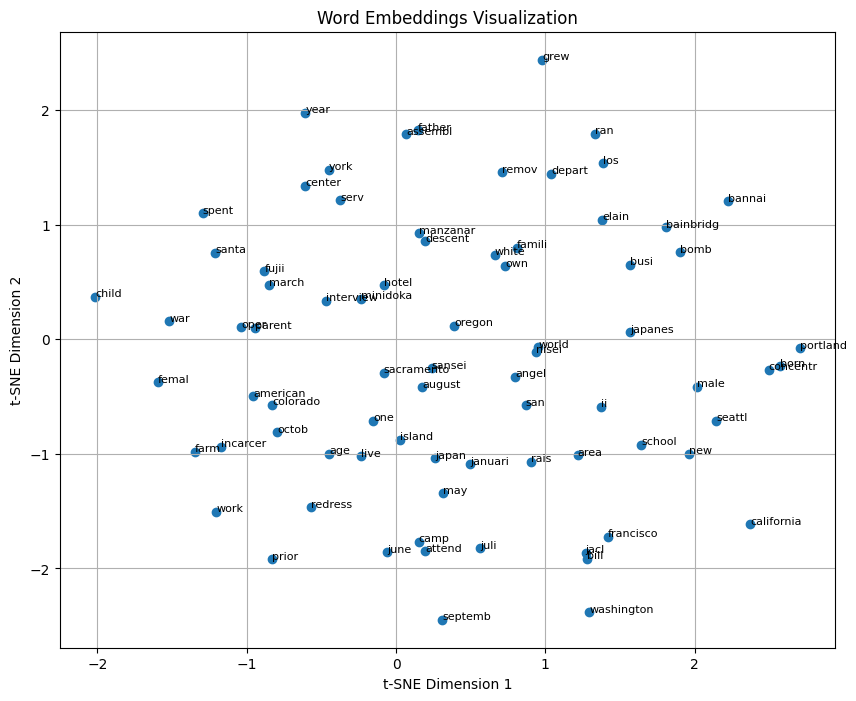

In [46]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample text data (you can replace this with your own dataset)
new_sentences = [str(new_text).lower().split() for new_text in df['New_Name_and_Description'][0:100]]

# Train Word2Vec model with 300 dimensions
new_model = Word2Vec(new_sentences, vector_size=300)

# Check the vector for a specific word
new_word_to_check = 'word'
if new_word_to_check in new_model.wv.key_to_index:
    new_vector = new_model.wv[new_word_to_check]
    print(f"Vector for '{new_word_to_check}': {new_vector}")
else:
    print(f"'{new_word_to_check}' not in vocabulary")

# Save the Word2Vec model
new_model.save('new_model.bin')

# Load the saved model
loaded_model = Word2Vec.load('new_model.bin')
print(loaded_model)

# Get vectors for all words in the vocabulary
new_X = np.array([new_model.wv.get_vector(word) for word in new_model.wv.index_to_key])

# Perform PCA for dimensionality reduction to 50 dimensions
new_pca = PCA(n_components=50)
result_pca = new_pca.fit_transform(new_X)

# Perform t-SNE for further dimensionality reduction to 2 dimensions
new_tsne = TSNE(n_components=2, random_state=42)
result_tsne = new_tsne.fit_transform(result_pca)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(result_tsne[:, 0], result_tsne[:, 1], marker='o')

# Annotate words on the plot
words = list(new_model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result_tsne[i, 0], result_tsne[i, 1]), fontsize=8)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word Embeddings Visualization')
plt.grid(True)
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:
"https://github.com/vicky1402/Spring_Info5731/tree/9d3999a65ce450601067cfa8ccc334b2bace4987/Assignment"



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
"""In this Assignment I learned how to do sentiment analysis on N gram . I enjoyed plotting in the third question and adding the sentiment
to the csv file and generating it finding the document cosine functiona and genrating TFIDF and i learned a lot about n-grams and many. """